# Orders dataset

## Loading the data

In [3]:
import pandas as pd

# Import data
df1 = pd.read_csv("./orders/FirstMillionLines.csv")
df2 = pd.read_csv("./orders/SecondMillionLines.csv")
df3 = pd.read_csv("./orders/ThirdMillionLines.csv")

In [4]:
# Check for incosistent dimensions
print("Shape:", df1.shape)
print("Shape:", df2.shape)
print("Shape:", df3.shape)

Shape: (1000000, 15)
Shape: (1000000, 15)
Shape: (604981, 15)


Amount of columns is consistent, amount of rows isn't. However, that's fine.

In [5]:
# Join dataframes
orders = df1.merge(df2, how='outer')
orders = orders.merge(df3, how='outer')

In [6]:
# Show orders info
print("Shape:", orders.info())

# Show orders head
orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604981 entries, 0 to 2604980
Data columns (total 15 columns):
Customer Number           int64
DoB                       object
Gender                    object
PoR                       object
Order number              int64
Order date                object
Product number            float64
Sub category              object
Category                  object
Count                     int64
Price                     float64
Expected delivery time    int64
Actual delivery time      int64
Reason of return          object
Rating                    int64
dtypes: float64(2), int64(6), object(7)
memory usage: 318.0+ MB
Shape: None


,Customer Number,DoB,Gender,PoR,Order number,Order date,Product number,Sub category,Category,Count,Price,Expected delivery time,Actual delivery time,Reason of return,Rating
0,1019099,15/09/1984,Man,Loppersum,1606586,7-12-2016,5.180000e+12,Garden sets,Garden furniture,1,1049.97,2,2,NaN,2
1,1049989,01/06/1969,Man,Goeree-Overflakkee,554370,15/01/2016,4.170000e+12,Garden tables,Garden furniture,1,366.90,8,8,NaN,-1
2,1068587,19/02/1970,Man,Terneuzen,1146785,16/05/2014,7.170000e+12,Garden statues,Garden decoration,1,493.95,2,2,NaN,-1
3,1026863,27/11/1972,Man,Sittard-Geleen,1146785,14/05/2014,4.110000e+12,Garden sets,Garden furniture,1,234.74,2,5,NaN,-1
4,1049989,01/06/1969,Man,Goeree-Overflakkee,554370,15/01/2016,3.160000e+12,Garden sets,Garden furniture,1,1436.62,3,8,NaN,-1


## Cleaning the Data

Checking for missing data

In [7]:
# Show missing data
print("Missing data: ")
print(orders.isnull().sum(), "\n")

Missing data: 
Customer Number                 0
DoB                             0
Gender                          0
PoR                             0
Order number                    0
Order date                      0
Product number                155
Sub category                    0
Category                        0
Count                           0
Price                           0
Expected delivery time          0
Actual delivery time            0
Reason of return          2478588
Rating                          0
dtype: int64 



Not a lot of data is missing, only 155 product numbers. Reason of return is so high because those weren't returns. 

Make smaller set for quick exploration

In [8]:
# Truncate data to explore faster
orders_small = orders.truncate(before=200001, after=300000)
orders_small.shape

(100000, 15)

## Look at data types and change if necessary

In [9]:
# Some column types should be changed to datetime
orders_small['DoB'] = orders_small['DoB'].astype('datetime64[ns]')
orders_small['Order date'] = orders_small['Order date'].astype('datetime64[ns]')
orders_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 200001 to 300000
Data columns (total 15 columns):
Customer Number           100000 non-null int64
DoB                       100000 non-null datetime64[ns]
Gender                    100000 non-null object
PoR                       100000 non-null object
Order number              100000 non-null int64
Order date                100000 non-null datetime64[ns]
Product number            99994 non-null float64
Sub category              100000 non-null object
Category                  100000 non-null object
Count                     100000 non-null int64
Price                     100000 non-null float64
Expected delivery time    100000 non-null int64
Actual delivery time      100000 non-null int64
Reason of return          4881 non-null object
Rating                    100000 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(6), object(5)
memory usage: 12.2+ MB


In [10]:
orders_small['Gender'].value_counts(dropna=False)

Man      69444
Woman    30536
\           20
Name: Gender, dtype: int64

In [11]:
# Gender should be an int: 0 for male 1 for female
orders_small['Gender int'] = orders_small['Gender']
orders_small['Gender int'] = orders_small['Gender int'].replace('Man', '0')
orders_small['Gender int'] = orders_small['Gender int'].replace('Woman', '1')
orders_small['Gender int'] = orders_small['Gender int'].replace('\\ ', '-1')
orders_small['Gender int'].value_counts(dropna=False)

0     69444
1     30536
-1       20
Name: Gender int, dtype: int64

In [12]:
# Change gender column type
orders_small['Gender int'] = orders_small['Gender int'].astype('int64')
orders_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 200001 to 300000
Data columns (total 16 columns):
Customer Number           100000 non-null int64
DoB                       100000 non-null datetime64[ns]
Gender                    100000 non-null object
PoR                       100000 non-null object
Order number              100000 non-null int64
Order date                100000 non-null datetime64[ns]
Product number            99994 non-null float64
Sub category              100000 non-null object
Category                  100000 non-null object
Count                     100000 non-null int64
Price                     100000 non-null float64
Expected delivery time    100000 non-null int64
Actual delivery time      100000 non-null int64
Reason of return          4881 non-null object
Rating                    100000 non-null int64
Gender int                100000 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(7), object(5)
memory usage: 13.0+ MB


## Map category to numbers

In [13]:
# get all categories
cat = orders_small['Category'].unique()
# create new column cat. numbers
orders_small['Cat. number'] = orders_small['Category']

In [14]:
# replace all values with numbers
i = 0

for c in cat:
    orders_small['Cat. number'] = orders_small['Cat. number'].replace(c, str(i))
    i = i + 1
    # print(c + " is equal to " + str(i))

### Do the same for sub category

In [15]:
subC = orders_small['Sub category'].unique()
orders_small['Sub cat. number'] = orders_small['Sub category']

In [16]:
i = 0

for c in subC:
    orders_small['Sub cat. number'] = orders_small['Sub cat. number'].replace(c, str(i))
    i = i + 1
    # print(c + " is equal to " + str(i))

### Do the same again for place of residence

In [17]:
por = orders_small['PoR'].unique()
orders_small['PoR number'] = orders_small['PoR']

In [18]:
i = 0

for c in por:
    orders_small['PoR number'] = orders_small['PoR number'].replace(c, str(i))
    i = i + 1
    # print(c + " is equal to " + str(i))

### And month of the year

In [19]:
orders_small['Month'] = pd.DatetimeIndex(orders_small['Order date']).month

## And birthyear...

In [20]:
orders_small['Birthyear'] = pd.DatetimeIndex(orders_small['DoB']).year

In [21]:
# convert to int64 to show on heatmap
orders_small['Cat. number'] = orders_small['Cat. number'].astype('int64')
orders_small['Sub cat. number'] = orders_small['Sub cat. number'].astype('int64')
orders_small['PoR number'] = orders_small['PoR number'].astype('int64')
orders_small['Month'] = orders_small['Month'].astype('int64')
orders_small['Birthyear'] = orders_small['Birthyear'].astype('int64')
orders_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 200001 to 300000
Data columns (total 21 columns):
Customer Number           100000 non-null int64
DoB                       100000 non-null datetime64[ns]
Gender                    100000 non-null object
PoR                       100000 non-null object
Order number              100000 non-null int64
Order date                100000 non-null datetime64[ns]
Product number            99994 non-null float64
Sub category              100000 non-null object
Category                  100000 non-null object
Count                     100000 non-null int64
Price                     100000 non-null float64
Expected delivery time    100000 non-null int64
Actual delivery time      100000 non-null int64
Reason of return          4881 non-null object
Rating                    100000 non-null int64
Gender int                100000 non-null int64
Cat. number               100000 non-null int64
Sub cat. number           100000 non-null in

In [22]:
# check if it worked
orders_small.head()

,Customer Number,DoB,Gender,PoR,Order number,Order date,Product number,Sub category,Category,Count,...,Expected delivery time,Actual delivery time,Reason of return,Rating,Gender int,Cat. number,Sub cat. number,PoR number,Month,Birthyear
200001,1034725,1973-08-19,Man,Beemster,182832,2014-03-01,1.170000e+12,Garden chairs,Garden furniture,1,...,2,2,NaN,-1,0,0,0,0,3,1973
200002,1021865,1969-08-05,Man,Alphen aan den Rijn,977291,2013-10-06,8.170000e+12,Hedge trimmers,Pruning,1,...,1,4,NaN,-1,0,1,1,1,10,1969
200003,1012883,1974-04-17,Man,Weststellingwerf,38679,2013-03-15,5.130000e+12,Grass shears,Gardening tools,2,...,2,-1,No reason given,-1,0,2,2,2,3,1974
200004,1068425,1968-01-14,Woman,De Fryske Marren,910199,2013-01-21,2.160000e+12,Lounge sets,Lounge furniture,1,...,4,4,NaN,4,1,3,3,3,1,1968
200005,1079741,1974-10-20,Man,Barneveld,1037042,2013-10-26,8.120000e+12,Pruning shears,Pruning,1,...,2,2,NaN,-1,0,1,4,4,10,1974


Now that all columns are usable types and the data is cleaned, we can start exploring

## Exploratory Data Analysis

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = orders_small['Expected delivery time']
y = orders_small['Actual delivery time']

color = orders_small['Rating']
scale = orders_small['Rating'] * 50;
ax.scatter(x, y, c=color, s=scale, alpha=0.3, edgecolors='none')
# ax.scatter(x2, y2, c='pink', s=scale, alpha=0.7, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 6)

# Set labels
plt.title('Ratings and Delivery Time')
ax.set_xlabel(r'Expected delivery time', fontsize=12)
ax.set_ylabel(r'Actual delivery time', fontsize=12)

plt.show()

C:\Users\sverr\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 1000x600 with 1 Axes>

As can be seen by the straight line going from (0,0) to about (48,48), most orders arrive at around the expected delivery time. There seems to be no correlation between late orders and ratings.

In [24]:
# Use seaborn to show plots
import seaborn as sns; sns.set()

In [25]:
# selected_feature_names=['Gender', 'Product number', 'Count', 'Price', 'Expected delivery time', 'Actual delivery time', 'Rating']
# sns.pairplot(orders_small, vars=selected_feature_names, height=5)

In [26]:
# # Zoom in
# sns.pairplot(orders_small, x_vars=['Rating', 'Actual delivery time'], y_vars=['Product number'], height=7)

## Predict what products new customers may buy based on their age, gender and possibly place or residence.

In [27]:
# selected_feature_names=['Gender', 'Product number', 'Birthyear']
# sns.pairplot(orders_small, vars=selected_feature_names, height=5)

Focus on age and product number 

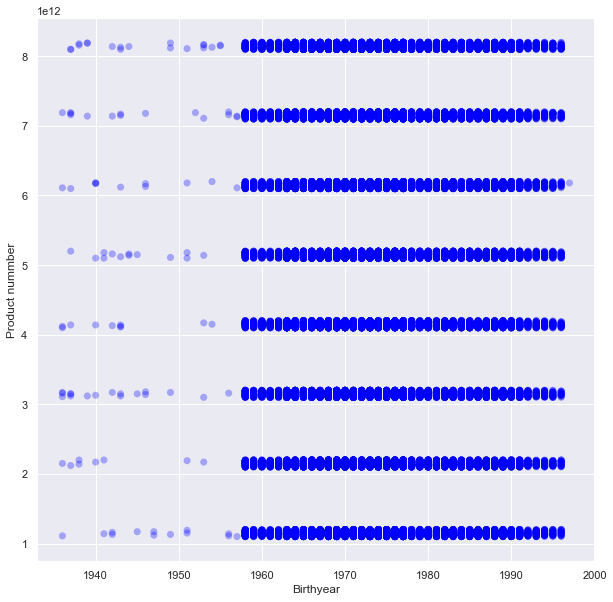

In [28]:
fig, ax = plt.subplots()

x = orders_small['Birthyear']
y = orders_small['Product number']

# color = orders_small['Age']

color = 'blue'
scale = 50
ax.scatter(x, y, c=color, s=scale, alpha=0.3, edgecolors='none')
# ax.scatter(x2, y2, c='pink', s=scale, alpha=0.7, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)
# ax.set_ylim([5.000000e+12,5.300000e+12])

# Set labels
# plt.title('Ratings and Delivery Time')
ax.set_xlabel(r'Birthyear', fontsize=12)
ax.set_ylabel(r'Product nummber', fontsize=12)

plt.show()

In [29]:
orders_small['Birthyear'][orders_small['Category'] == 'Garden furniture'].count()

34651

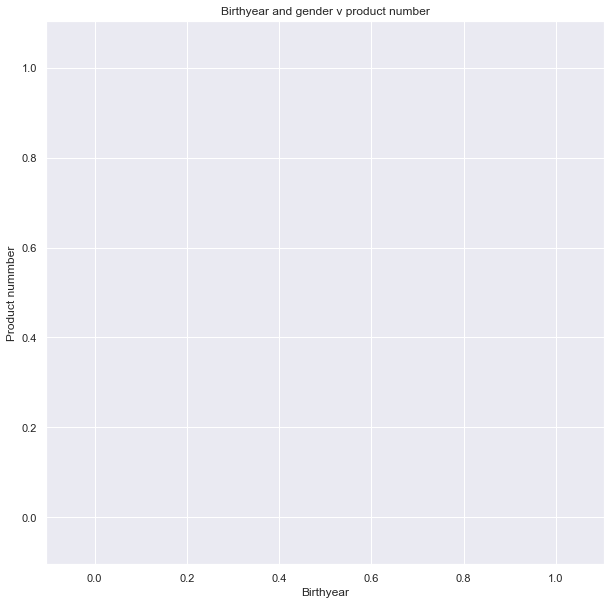

In [30]:
fig, ax = plt.subplots()

x = orders_small['Birthyear'][orders_small['Gender'] == 0]
y = orders_small['Category'][orders_small['Gender'] == 0]

x2 = orders_small['Birthyear'][orders_small['Gender'] == 1]
y2 = orders_small['Category'][orders_small['Gender'] == 1]

scale = 20

ax.scatter(x, y, c='blue', s=scale, alpha=0.5, edgecolors='none')
ax.scatter(x2, y2, c='pink', s=scale, alpha=0.3, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)

#set labels
plt.title('Birthyear and gender v product number')
ax.set_xlabel(r'Birthyear', fontsize=12)
ax.set_ylabel(r'Product nummber', fontsize=12)

plt.show()

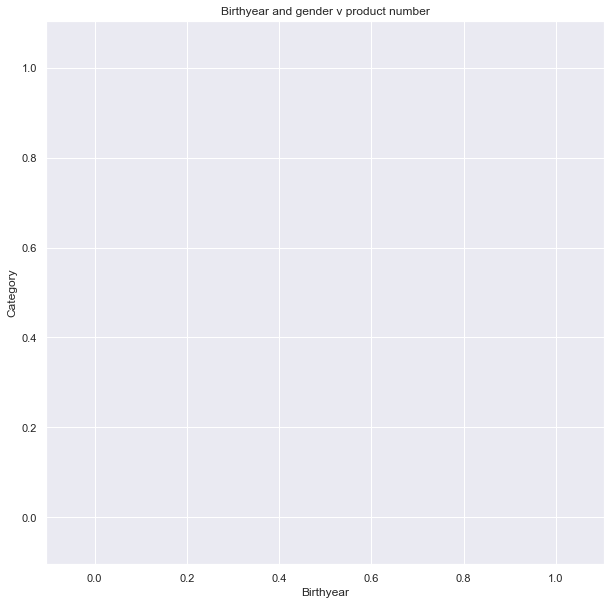

In [31]:
fig, ax = plt.subplots()

x = orders_small['Birthyear'][orders_small['Gender'] == 0]
y = orders_small['Category'][orders_small['Gender'] == 0]

x2 = orders_small['Birthyear'][orders_small['Gender'] == 1]
y2 = orders_small['Category'][orders_small['Gender'] == 1]

scale = 20

ax.scatter(x, y, c='blue', s=scale, alpha=0.5, edgecolors='none')
ax.scatter(x2, y2, c='pink', s=scale, alpha=0.3, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)
# ax.set_xlim(40,60)

#set labels
plt.title('Birthyear and gender v product number')
ax.set_xlabel(r'Birthyear', fontsize=12)
ax.set_ylabel(r'Category', fontsize=12)

plt.show()

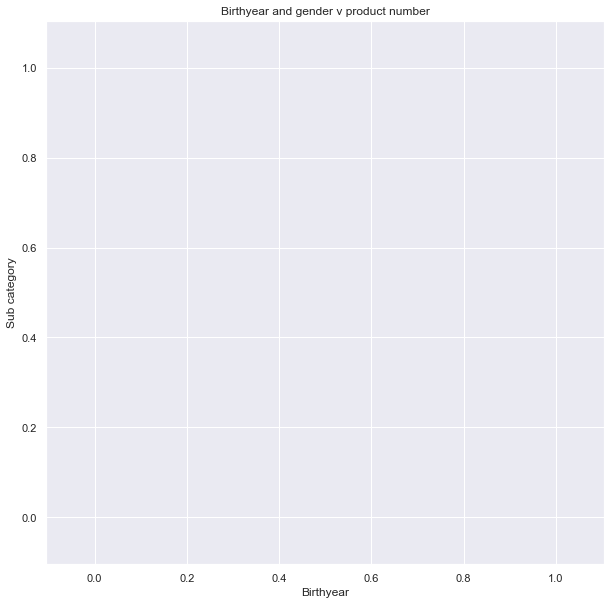

In [32]:
fig, ax = plt.subplots()

x = orders_small['Birthyear'][orders_small['Gender'] == 0]
y = orders_small['Sub category'][orders_small['Gender'] == 0]

x2 = orders_small['Birthyear'][orders_small['Gender'] == 1]
y2 = orders_small['Sub category'][orders_small['Gender'] == 1]

scale = 20

ax.scatter(x, y, c='blue', s=scale, alpha=0.5, edgecolors='none')
ax.scatter(x2, y2, c='pink', s=scale, alpha=0.3, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)
# ax.set_xlim(40,60)

#set labels
plt.title('Birthyear and gender v product number')
ax.set_xlabel(r'Birthyear', fontsize=12)
ax.set_ylabel(r'Sub category', fontsize=12)

plt.show()

## Heatmap

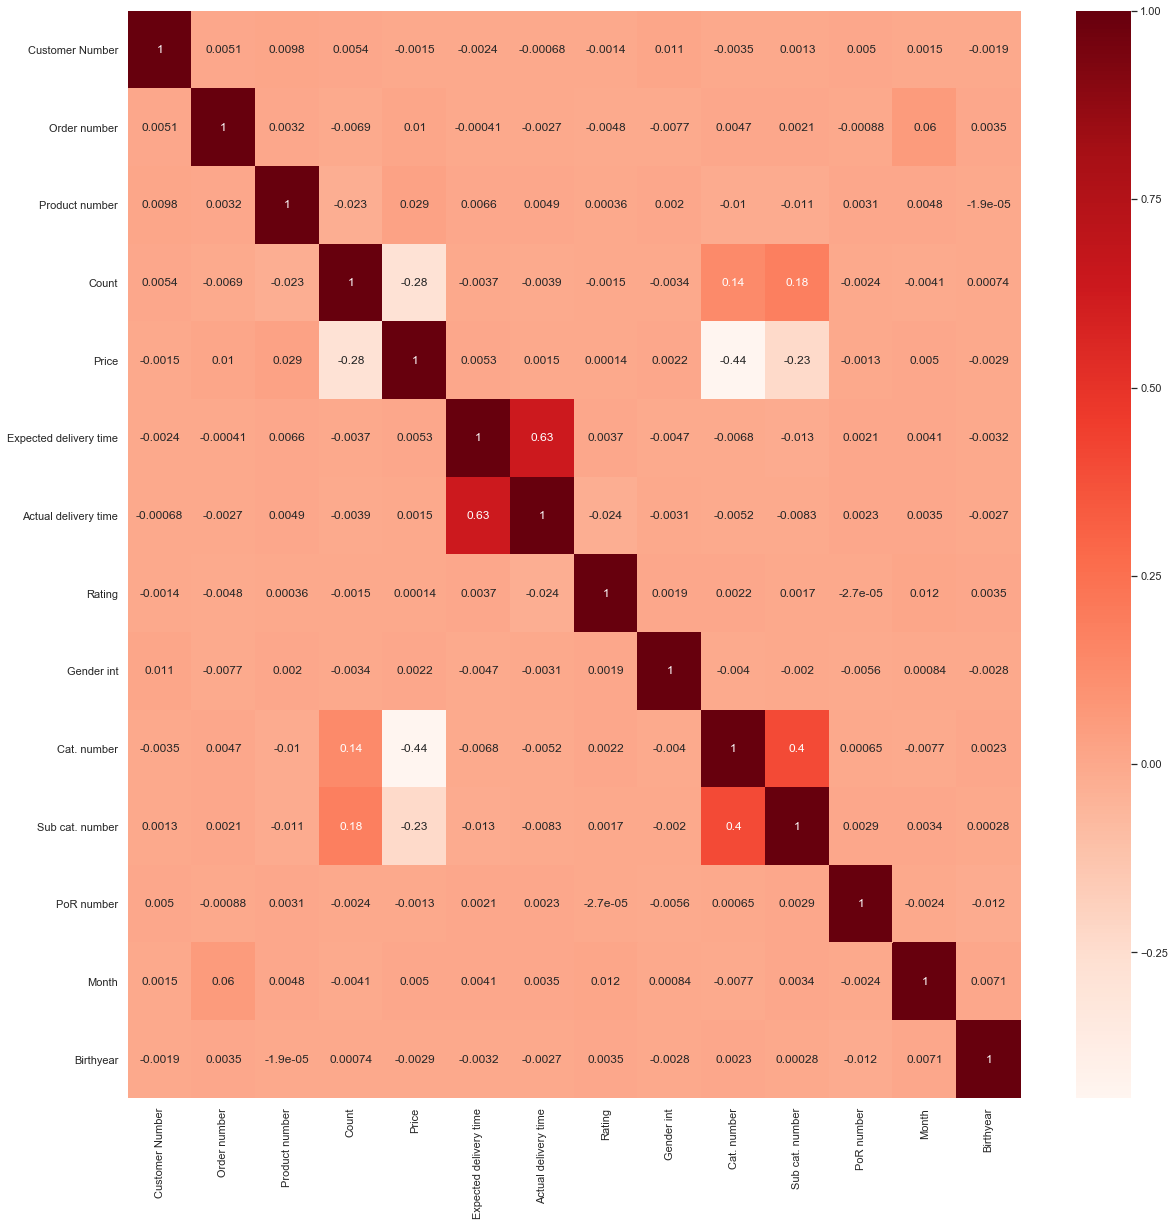

In [33]:
plt.figure(figsize=(20,20))
cor = orders_small.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

# Predictive analysis

## Preparation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
from scipy.stats import sem

#use all available data
orders_x2 = orders_small[['Birthyear', 'Gender int']]
orders_x = orders_small[['Birthyear', 'Gender int', 'Month']]
orders_y2 = orders_small['Sub cat. number']
orders_y = orders_small['Cat. number']
orders_y3 = orders_small['Count']

In [38]:
# split data
x_train, x_test, y_train, y_test = train_test_split(orders_x, orders_y, test_size=0.2)

In [39]:
# create normalised set
x_train_n = np.array(x_train)
y_train_n = np.array(y_train)
preprocessing.normalize(x_train_n)
preprocessing.normalize(y_train_n.reshape(-1,1))

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [40]:
# imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import LinearSVC
from sklearn import neighbors as n
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

## LinearSVC

In [ ]:
svc = LinearSVC(class_weight='balanced', max_iter=2000, random_state=0)

# fit training data
svc.fit(x_train_n, y_train_n)

# calculate prediction
y_pred = svc.predict(x_test)
print("Accuracy: ", svc.score(x_test, y_test))

In [ ]:
# cross validation

def evaluate_cross_val(clf, x, y, k):
    kf = KFold(k, shuffle=True, random_state=0)
    scores = cross_val_score(clf, x, y, cv=kf)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    
evaluate_cross_val(svc, x_train_n, y_train_n, 5)

## Nearest Neighbors

In [ ]:
n_neighbors = 200 # value of 200 produces best results
clf = n.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(x_train_n, y_train_n)

# calculate prediction
y_pred = clf.predict(x_test)
print("Accuracy: ", clf.score(x_test, y_test))

In [ ]:
# cross validation
def evaluate_cross_val(clf, x, y, k):
    kf = KFold(k, shuffle=True, random_state=0)
    scores = cross_val_score(clf, x, y, cv=kf)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    
evaluate_cross_val(clf, x_train_n, y_train_n, 5)

## Decision Trees

In [ ]:
tr = DecisionTreeClassifier(random_state=0, min_samples_split=250)
tr.fit(x_train_n, y_train_n)

# calculate prediction
y_pred = tr.predict(x_test)
print("Accuracy: ", tr.score(x_test, y_test))

In [ ]:
# cross validation
def evaluate_cross_val(clf, x, y, k):
    kf = KFold(k, shuffle=True, random_state=0)
    scores = cross_val_score(clf, x, y, cv=kf)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    
evaluate_cross_val(tr, x_train_n, y_train_n, 5)

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0)
rf.fit(x_train_n, y_train_n)

# calculate prediction
y_pred = rf.predict(x_test)
print("Accuracy: ", rf.score(x_test, y_test))

In [ ]:
# cross validation
def evaluate_cross_val(clf, x, y, k):
    kf = KFold(k, shuffle=True, random_state=0)
    scores = cross_val_score(clf, x, y, cv=kf)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    
evaluate_cross_val(rf, x_train_n, y_train_n, 5)